In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve

In [66]:
thresholds = {
    "VGG-Face": {"cosine": 0.40, "euclidean": 0.60, "euclidean_l2": 0.86}, # 0.86
    "Facenet": {"cosine": 0.40, "euclidean": 10, "euclidean_l2": 1.04}, # l2 0.80
    "Facenet512": {"cosine": 0.30, "euclidean": 23.56, "euclidean_l2": 1.04},
    "ArcFace": {"cosine": 0.68, "euclidean": 4.15, "euclidean_l2": 1.15}  # 1.13
}

In [36]:
def make_predictions(threshold, res_df):
    res_df["prediction"] = "No" #init
    idx = res_df[res_df.distance <= threshold].index
    res_df.loc[idx, 'prediction'] = 'Yes'
    return res_df

In [92]:
def calculate_metrics(results_data_frame):
    cm = confusion_matrix(results_data_frame.decision.values, results_data_frame.prediction.values)
    tn, fp, fn, tp = cm.ravel()
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn)/(tn + fp +  fn + tp)
    f1 = 2 * (precision * recall) / (precision + recall)
    # print(cm)
    # cm_display = ConfusionMatrixDisplay(cm).plot()
    # print("precision ", precision)
    # print("recall ", recall)
    # print("accuracy ", accuracy)
    # prec, recall, _ = precision_recall_curve(results_data_frame.decision.values, results_data_frame.prediction.values, pos_label="Yes")
    # pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    return [precision, recall, accuracy, f1]

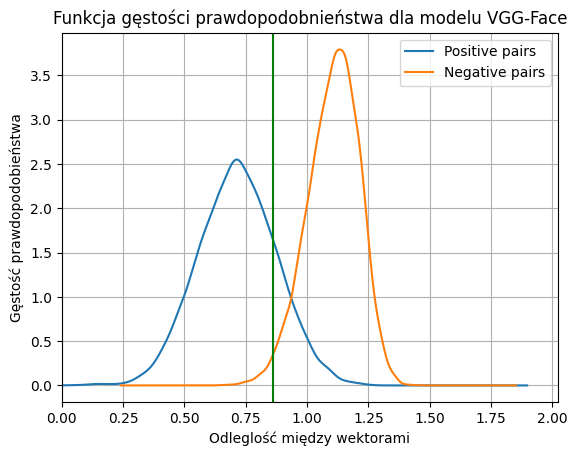

[[17709   291]
 [ 3326 14674]]
precision  0.9805546274640828
recall  0.8152222222222222
accuracy  0.8995277777777778


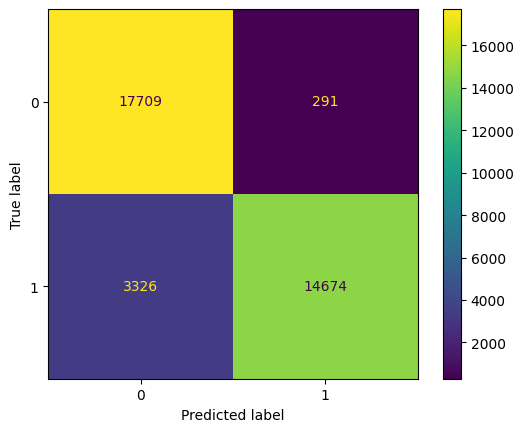

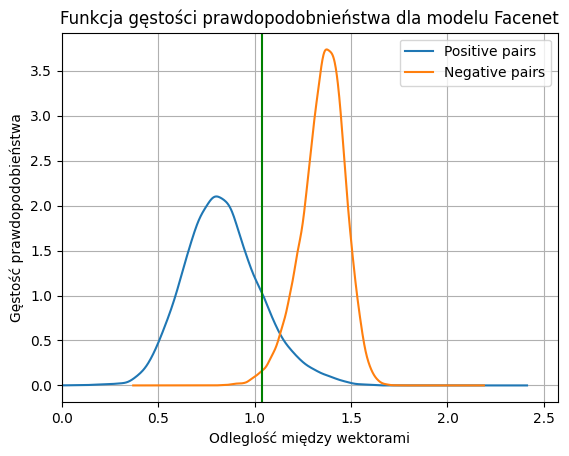

[[17819   181]
 [ 2683 15317]]
precision  0.9883210736869273
recall  0.8509444444444444
accuracy  0.9204444444444444


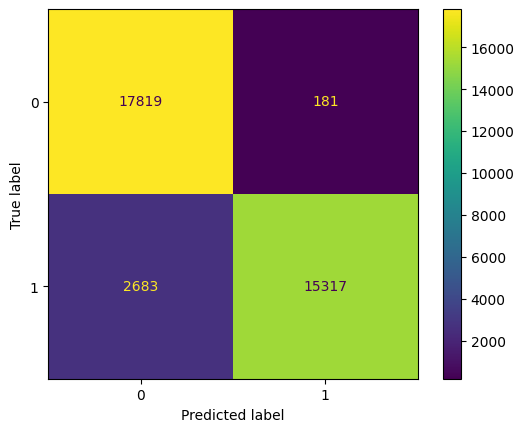

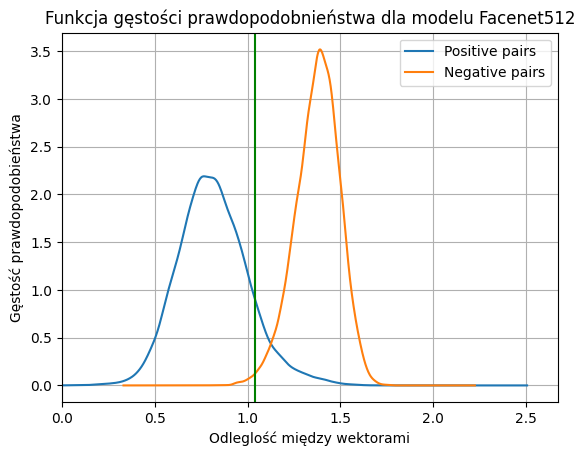

[[17878   122]
 [ 2020 15980]]
precision  0.9924233014532357
recall  0.8877777777777778
accuracy  0.9405


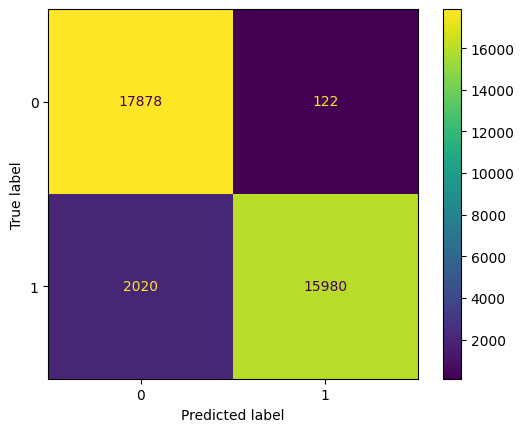

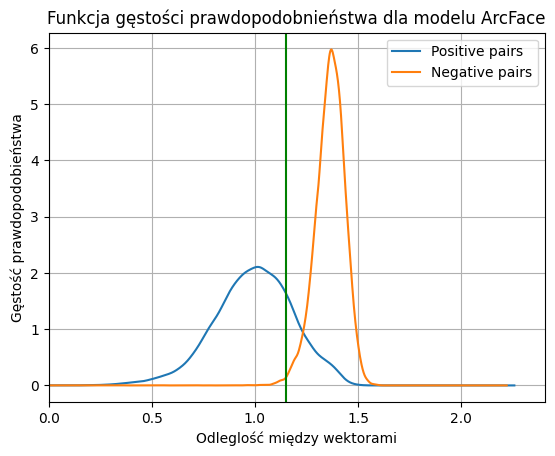

[[17894   106]
 [ 3735 14265]]
precision  0.9926240345139518
recall  0.7925
accuracy  0.8933055555555556


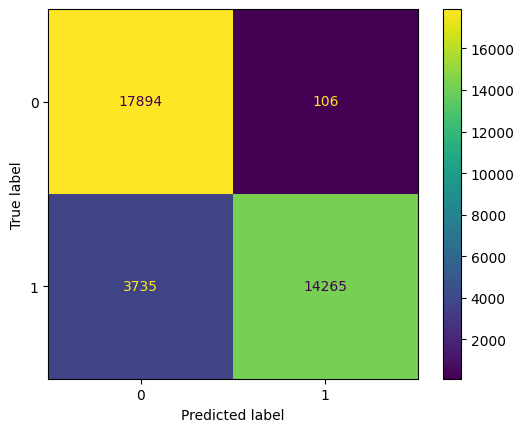

In [64]:
for selected_model in thresholds.keys():
    # selected_model = "Facenet512"
    threshold = thresholds.get(selected_model).get("euclidean_l2")
    df = pd.read_csv(f"results/result_{selected_model}.csv")
    # tp_mean = round(df[df.decision == "Yes"].distance.mean(), 4)
    # tp_std = round(df[df.decision == "Yes"].distance.std(), 4)
    # fp_mean = round(df[df.decision == "No"].distance.mean(), 4)
    # fp_std = round(df[df.decision == "No"].distance.std(), 4)
    # print("positive: ", tp_mean, tp_std)
    # print("negative: ", fp_mean, fp_std)
    # sigma = 1
    # threshold = round(tp_mean + sigma * tp_std, 4)
    # print("statistical threshold, ", sigma, " sigma ", threshold)

    plt.figure()
    df[df.decision == "Yes"].distance.plot.kde()
    df[df.decision == "No"].distance.plot.kde()
    plt.legend(["Positive pairs", "Negative pairs"])
    plt.title(f'Funkcja gęstości prawdopodobnieństwa dla modelu {selected_model}')
    plt.xlabel("Odleglość między wektorami")
    plt.ylabel("Gęstość prawdopodobieństwa")
    plt.xlim(left=0)
    plt.grid()
    # plt.axhline(0,color='red')
    # plt.axvline(0,color='red')
    plt.axvline(threshold, color="green")
    plt.show()
    df = make_predictions(threshold, df)
    calculate_metrics(df)

0.9805546274640828 0.8152222222222222 0.8995277777777778
0.9785660991657058 0.8015 0.8919722222222223
0.9751377210785735 0.7473888888888889 0.8641666666666666
0.9721316818774446 0.6627777777777778 0.8218888888888889
0.9677078327727054 0.5593888888888889 0.7703611111111112
0.9592989060110575 0.45305555555555554 0.7169166666666666
0.9883210736869273 0.8509444444444444 0.9204444444444444
0.9878619961738901 0.8319444444444445 0.9108611111111111
0.9889285454148153 0.7542777777777778 0.8729166666666667
0.985683107813182 0.6272777777777778 0.8090833333333334
0.9828632631203141 0.4588333333333333 0.7254166666666667
0.979469300794112 0.28094444444444444 0.6375277777777778
0.9924233014532357 0.8877777777777778 0.9405
0.9925673973293021 0.8754444444444445 0.9344444444444444
0.9917897106535125 0.8321666666666667 0.9126388888888889
0.9898034037558685 0.7496111111111111 0.8709444444444444
0.9881186426190273 0.6422222222222222 0.81725
0.9878087905036894 0.5131666666666667 0.7534166666666666
0.9926240

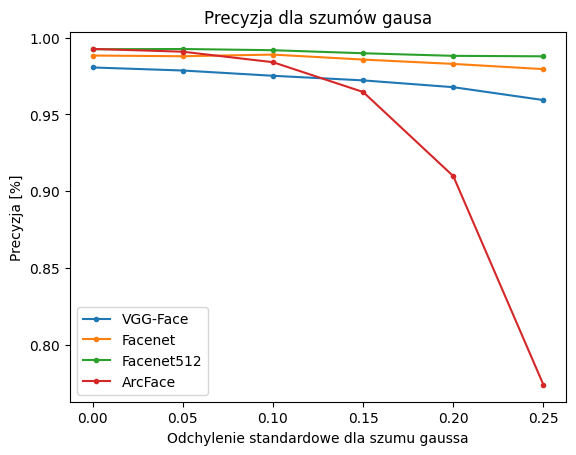

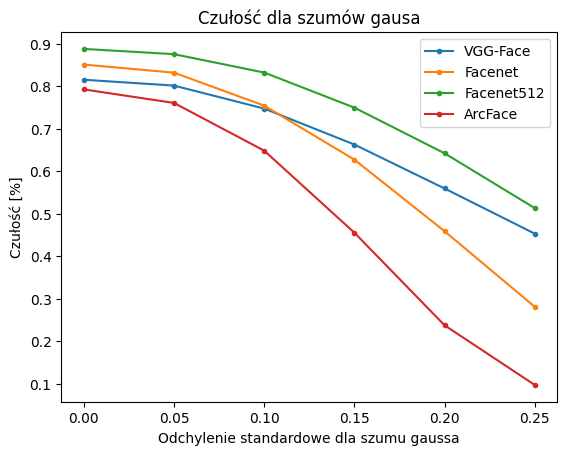

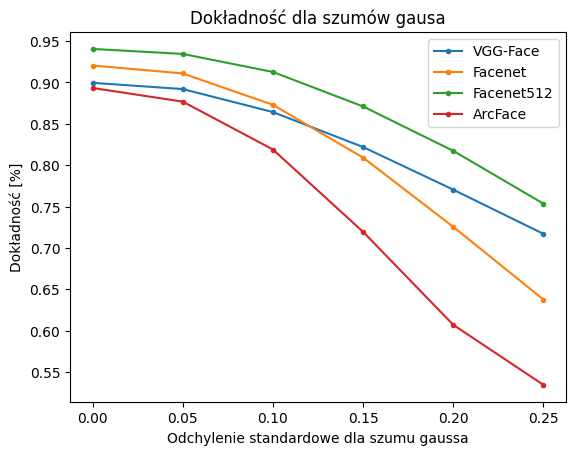

In [104]:
noise_type = "gaussian"
x_axis = np.arange(0, 0.3, 0.05).tolist()
results = {}

for model in thresholds.keys():
    threshold = thresholds.get(model).get("euclidean_l2")
    result = []
    for noise in x_axis:
        if noise == 0: 
            df = pd.read_csv(f"results/result_{model}.csv")   
        else:
            num = f"{noise:.2f}".replace(".", "_")
            df = pd.read_csv(f"results/result_{model}_{noise_type}_{num}.csv")  
        df = make_predictions(threshold, df)
        precision, recall, accuracy, f1 = calculate_metrics(df)
        print(precision, recall, accuracy)
        result.append([precision, recall, accuracy, f1])
    results[model] = result

plt.figure(1)
plt.figure(2)
plt.figure(3)
models = []
for model in thresholds.keys():
    models.append(model)
    y_axis = [i[0] for i in results[model]]
    # print(x_axis, y_axis)
    
    plt.figure(1)
    plt.plot(x_axis, y_axis, ".-", label=model)
    plt.title("Precyzja dla szumów gausa")
    plt.ylabel("Precyzja [%]")
    plt.xlabel("Odchylenie standardowe dla szumu gaussa")

    plt.figure(2)
    y_axis = [i[1] for i in results[model]]
    plt.plot(x_axis, y_axis, ".-", label=model)
    plt.title("Czułość dla szumów gausa")
    plt.ylabel("Czułość [%]")
    plt.xlabel("Odchylenie standardowe dla szumu gaussa")

    plt.figure(3)
    y_axis = [i[2] for i in results[model]]
    plt.plot(x_axis, y_axis, ".-", label=model)
    plt.title("Dokładność dla szumów gausa")
    plt.ylabel("Dokładność [%]")
    plt.xlabel("Odchylenie standardowe dla szumu gaussa")

plt.figure(1)
plt.legend()
plt.figure(2)
plt.legend()
plt.figure(3)  
plt.legend()